In [13]:
!pip install kaggle

In [14]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
!kaggle datasets download -d saramhai/people-with-and-without-glasses-dataset


Dataset URL: https://www.kaggle.com/datasets/saramhai/people-with-and-without-glasses-dataset
License(s): unknown
 99% 458M/465M [00:07<00:00, 55.7MB/s]
100% 465M/465M [00:07<00:00, 61.4MB/s]


In [16]:
!ls

celeba-dataset.zip    list_eval_partition.csv
img_align_celeba      list_landmarks_align_celeba.csv
kaggle.json	      people-with-and-without-glasses-dataset.zip
list_attr_celeba.csv  sample_data
list_bbox_celeba.csv


In [17]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/people-with-and-without-glasses-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [19]:
!ls

celeba-dataset.zip    list_bbox_celeba.csv
Images		      list_eval_partition.csv
img_align_celeba      list_landmarks_align_celeba.csv
kaggle.json	      people-with-and-without-glasses-dataset.zip
list_attr_celeba.csv  sample_data


In [20]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [38]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [23]:
filenames = os.listdir('/content/Images')

In [24]:
type(filenames)

list

In [25]:
len(filenames)

2

In [26]:
filenames_glasses = os.listdir('/content/Images/glasses')

In [29]:
type(filenames_glasses)

list

In [30]:
len(filenames_glasses)

2769

In [31]:
print(filenames_glasses[0:5])
print(filenames_glasses[-5:])

['face-4076.jpg', 'face-4685.jpg', 'face-403.jpg', 'face-777.jpg', 'face-1906.jpg']
['face-1519.jpg', 'face-3417.jpg', 'face-2614.jpg', 'face-2461.jpg', 'face-2168.jpg']


In [34]:
filenames_no_glasses = os.listdir('/content/Images/no_glasses')

In [35]:
type(filenames_no_glasses)

list

In [36]:
len(filenames_no_glasses)

2151

In [37]:
print(filenames_no_glasses[0:5])
print(filenames_no_glasses[-5:])

['face-2526.jpg', 'face-4584.jpg', 'face-476.jpg', 'face-3679.jpg', 'face-54.jpg']
['face-435.jpg', 'face-3886.jpg', 'face-2071.jpg', 'face-3232.jpg', 'face-1339.jpg']


In [39]:
image_size = (128, 128)  # common size to resize all images
image_dir = '/content/Images'

data = []
labels = []

for label_dir in ['glasses', 'no_glasses']:
    label_path = os.path.join(image_dir, label_dir)
    label = 1 if label_dir == 'glasses' else 0

    for fname in os.listdir(label_path):
        img_path = os.path.join(label_path, fname)
        try:
            img = load_img(img_path, target_size=image_size)
            img_array = img_to_array(img) / 255.0  # Normalize
            data.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")


In [40]:
data = np.array(data)
labels = np.array(labels)

X_train, X_val, y_train, y_val = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels)


In [41]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator()  # no augmentation for validation


In [42]:
batch_size = 32

train_generator = train_datagen.flow(
    X_train, y_train, batch_size=batch_size)

val_generator = val_datagen.flow(
    X_val, y_val, batch_size=batch_size)


In [43]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [45]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.5945 - loss: 0.6543 - val_accuracy: 0.9492 - val_loss: 0.2638
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.9165 - loss: 0.2929 - val_accuracy: 0.9837 - val_loss: 0.0714
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.9581 - loss: 0.1465 - val_accuracy: 0.9888 - val_loss: 0.0370
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.9662 - loss: 0.1128 - val_accuracy: 0.9949 - val_loss: 0.0312
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9792 - loss: 0.0842 - val_accuracy: 0.9898 - val_loss: 0.0233
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.9756 - loss: 0.0758 - val_accuracy: 0.9939 - val_loss: 0.0139
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.9836 - loss: 0.0557 - val_accuracy: 0.9990 - val_loss: 0.0113
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.9815 - loss: 0.0653 - val_accu

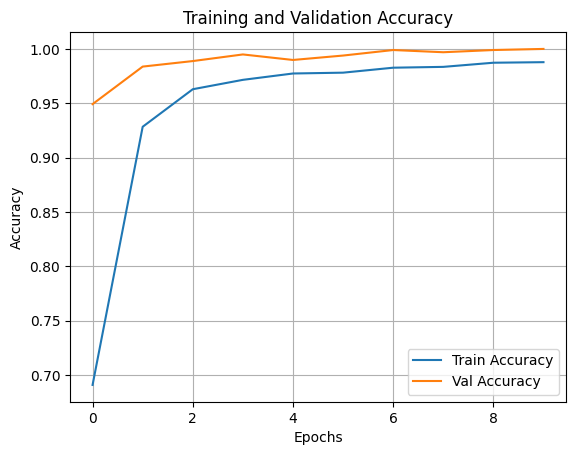

In [46]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Accuracy')
plt.show()


In [47]:
model.save('glasses_classifier.h5')


In [52]:
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

def predict_image(img_path):
    """
    Loads an image, displays it, and prints model prediction.
    """
    # Load and preprocess
    img = load_img(img_path, target_size=image_size)
    img_array = img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array_expanded)[0][0]
    label = "Glasses" if prediction > 0.5 else "No Glasses"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    # Display image
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{label} ({confidence:.2%})")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


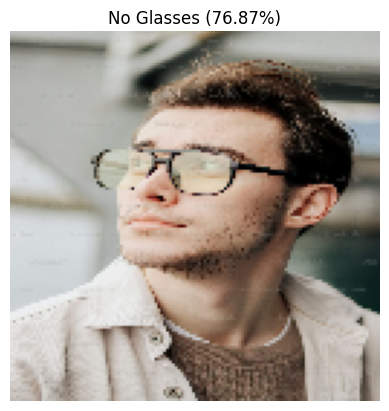

In [53]:
predict_image('/content/WhatsApp Image 2025-06-24 at 22.54.22_61a6fee4.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


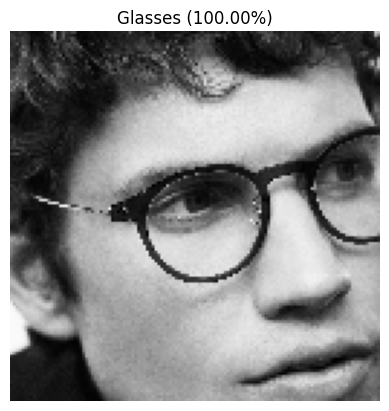

In [54]:
predict_image('/content/WhatsApp Image 2025-06-24 at 22.58.21_df5a1930.jpg')

In [55]:
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

def predict_image(img_path):
    """
    Loads, resizes, displays the image, and prints prediction.
    """
    # Load and resize image
    img = load_img(img_path, target_size=image_size)
    img_array = img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array_expanded)[0][0]
    label = "Glasses" if prediction > 0.5 else "No Glasses"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    # Display resized image
    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{label} ({confidence:.2%})", fontsize=14)
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


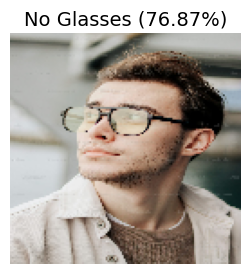

In [56]:
predict_image('/content/WhatsApp Image 2025-06-24 at 22.54.22_61a6fee4.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


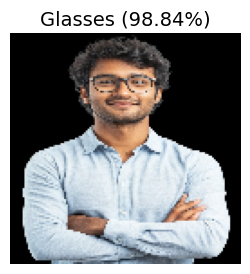

In [57]:
predict_image('/content/WhatsApp Image 2025-06-24 at 23.01.08_7fec90e5.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


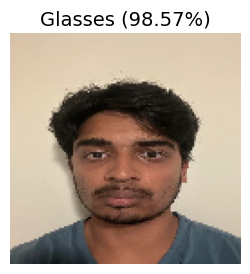

In [58]:
predict_image('/content/WhatsApp Image 2025-06-24 at 23.03.09_850a019d.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


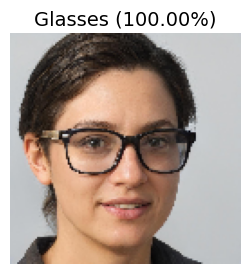

In [59]:
predict_image('/content/Images/glasses/face-1001.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


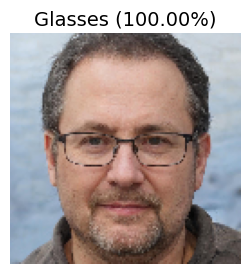

In [60]:
predict_image('/content/Images/glasses/face-1034.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


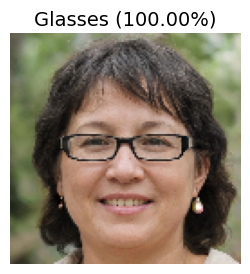

In [61]:
predict_image('/content/Images/glasses/face-1039.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


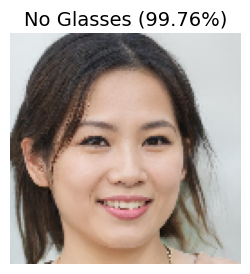

In [63]:
predict_image('/content/Images/no_glasses/face-1007.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


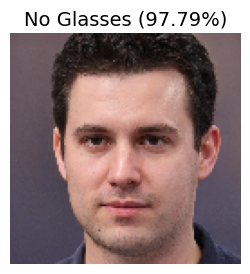

In [64]:
predict_image('/content/Images/no_glasses/face-1010.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


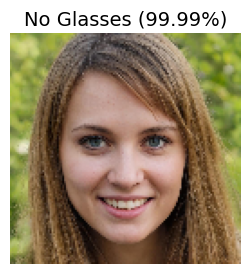

In [65]:
predict_image('/content/Images/no_glasses/face-1021.jpg')


Loading image from: /content/WhatsApp Image 2025-06-24 at 23.08.54_135888a8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


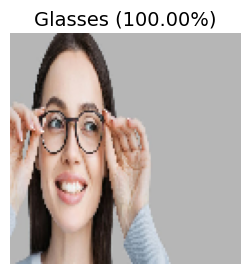

In [68]:
predict_image('/content/WhatsApp Image 2025-06-24 at 23.08.54_135888a8.jpg')


Loading image from: /content/WhatsApp Image 2025-06-24 at 23.10.34_f83765a3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


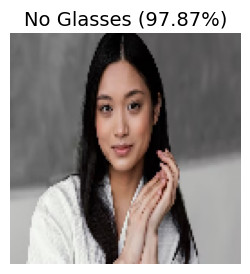

In [69]:
predict_image('/content/WhatsApp Image 2025-06-24 at 23.10.34_f83765a3.jpg')
